In [1]:
import sys
sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/LibFolder")
from Lib_GeneralFunctions import *
from Lib_GeneralSignalProcNAnalysis import *
from Lib_SigmoidProcessing import *
import pandas as pd
from matplotlib.gridspec import GridSpec

In [17]:
# Save into a class the 
class SSCreference:
    def __init__(self, filename, coordinates, RefSource="SEM2DPACK"):
        
        line = pd.read_csv(filename.format("slip"), header=None)
        self.Time = line[0]
        self.Slip = line[1]
        
        line = pd.read_csv(filename.format("sr"), header=None)
        self.SlipRate = line[1]
        
        self.Coord = coordinates #Only used for labels and printing
        self.RefSource = RefSource
    #end __init__
    
    # Default object printing information
    def __repr__(self):
        return "The TPV3reference object was generated from: {} and the receiver is located at {}".format(self.RefSource, self.Coord)
    #end __repr__
    
    def __str__(self):
        return "The TPV3reference object was generated from: {} and the receiver is located at {}".format(self.RefSource, self.Coord)
    #end __str__
    
    def PlotReference(self, ax, SlipSlipRate, filtering=True, **kwargs):
        
        if SlipSlipRate=="Slip":
            if(filtering):
                ax.plot(self.Time, Butterworth(self.Slip, **kwargs), label = "", c = "k", ls = "--", zorder=1)
            else:
                ax.plot(self.Time, self.Slip, label = "", c = "k", ls = "--", zorder=1)
        elif SlipSlipRate=="SlipRate":
            if(filtering):
                ax.plot(self.Time, Butterworth(self.SlipRate, **kwargs), label = "", c = "k", ls = "--", zorder=1)
            else:
                ax.plot(self.Time, self.SlipRate, label = "", c = "k", ls = "--", zorder=1)
            
        return ax

    
def GenericFigAxis():
    fig = plt.figure(figsize=[15,5])
    gs = GridSpec(1, 2)

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    
    
    return fig, [ax1, ax2]
    
def format_axes(fig):
    """
    Format a figure and 4 equidistant reveivers' lines from a single file. Receiver distance defines the color.
    """
    for i, ax in enumerate(fig.axes):
        ax.set_xlim(-0.5,4)
        ax.set_ylim(-0.5,8)
        ax.set_xlabel("time(s)")
        
    Lines = fig.axes[-1].get_lines()
    
    legend2 = fig.axes[-1].legend(Lines, ['2km','4km', '6km', '8km'], loc=1)
    fig.axes[-1].add_artist(legend2)
    fig.axes[-1].set_ylabel("Slip Rate (m/s)")
    fig.axes[0].set_ylabel("Slip (m)")

def Multi_format_axes(fig,cmap, LabelsPerColor):
    """
    Format a figure that contains different files with 
    information from several receivers for simulations under sets of blending parameters.
    """
    ColorDict = dict(enumerate(LabelsPerColor)) 
    
    
    for i, ax in enumerate(fig.axes):
        ax.set_xlim(-0.5,5)
        ax.set_ylim(-0.5,8)
        ax.set_xlabel("time(s)")
    Lines = []
    for idx,colcol in enumerate(cmap.colors):
        Lines.append(mlines.Line2D([], [], color = colcol,
                     linewidth = 3, label = ColorDict.get(idx)))
    
    legend2 = fig.axes[-1].legend(Lines, LabelsPerColor, loc = 2)
    fig.axes[-1].add_artist(legend2)
    fig.axes[-1].set_ylabel("Slip Rate (m/s)")
    fig.axes[0].set_ylabel("Slip (m)")
    

In [18]:
path = "/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/Output/"
# Reference saved into a list of objects
RefList = [SSCreference(path + "Reference/sem2dpack/sem2d-{}-1.txt", "2km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-2.txt", "4km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-3.txt", "6km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-4.txt", "8km"),
          ]

In [19]:
from matplotlib.colors import ListedColormap
import matplotlib.lines as mlines
from palettable.scientific.sequential import Oslo_3

cmap = ListedColormap(Oslo_3.mpl_colors[:])

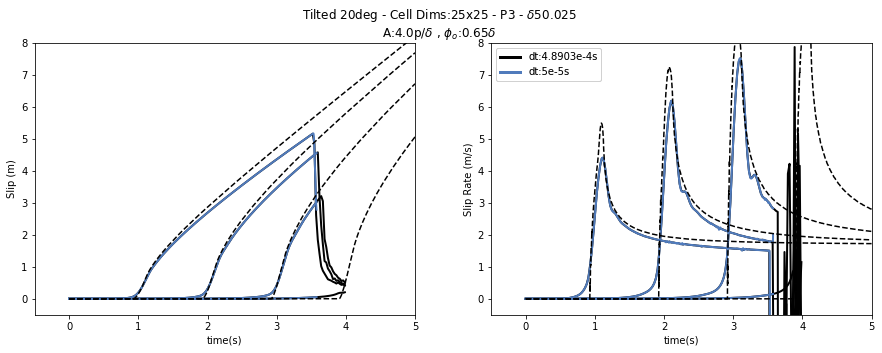

In [20]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/20210308-Tilting/"
FolderTiltedPath2 = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/20210304-Tilting/"
TiltedFile = LoadPickleFile(Filename = "TPList_t71520_d50.025.pickle",FolderPath = FolderTiltedPath)
TiltedFile2 = LoadPickleFile(Filename = "TPList_t8180_d50.025.pickle",FolderPath = FolderTiltedPath2)


fig, axis = GenericFigAxis()


# Tilted case plotting
iidx = 0
for Test1 in TiltedFile2[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 


iidx = 1
for Test1 in TiltedFile[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

    
LabelsPerColor= ["dt:4.8903e-4s","dt:5e-5s"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Tilted 20deg - Cell Dims:25x25 - P3 - $\delta$50.025 \nA:4.0p/$\delta$ , $\phi_o$:0.65$\delta$")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

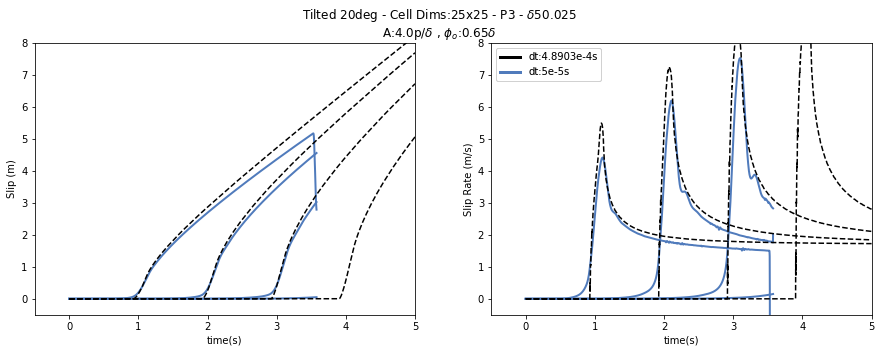

In [21]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/20210308-Tilting/"
FolderTiltedPath2 = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/20210304-Tilting/"
TiltedFile = LoadPickleFile(Filename = "TPList_t71520_d50.025.pickle",FolderPath = FolderTiltedPath)
TiltedFile2 = LoadPickleFile(Filename = "TPList_t8180_d50.025.pickle",FolderPath = FolderTiltedPath2)


fig, axis = GenericFigAxis()


# Tilted case plotting

iidx = 1
for Test1 in TiltedFile[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

    
LabelsPerColor= ["dt:4.8903e-4s","dt:5e-5s"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Tilted 20deg - Cell Dims:25x25 - P3 - $\delta$50.025 \nA:4.0p/$\delta$ , $\phi_o$:0.65$\delta$")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

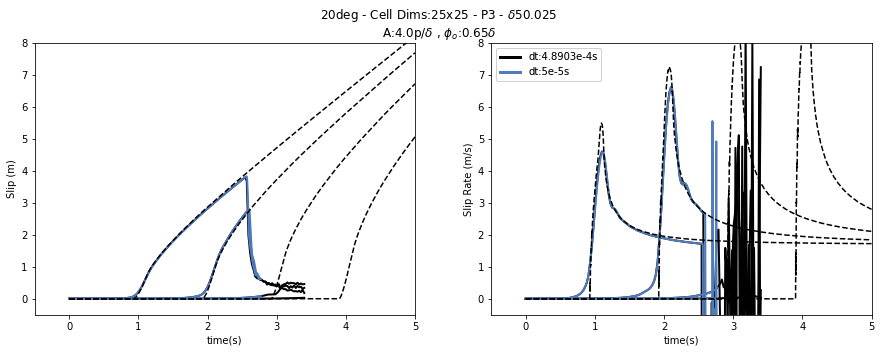

In [22]:
FolderSigmoidPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/"


SigmoidFile2 = LoadPickleFile(FolderSigmoidPath, "20210222-T3-25x25-P3-50.025")
SigmoidFile = LoadPickleFile(FolderSigmoidPath, "20210309-T1-25x25-P3-50.025")



fig, axis = GenericFigAxis()



# Sigmoid case plotting
iidx = 0
for Test1 in SigmoidFile2:
    axis[0].plot(Test1.Time, Test1.Slip, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.SlipRate, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 


iidx = 1
for Test1 in SigmoidFile:
    axis[0].plot(Test1.Time, Test1.Slip, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.SlipRate, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 



LabelsPerColor= ["dt:4.8903e-4s","dt:5e-5s"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("20deg - Cell Dims:25x25 - P3 - $\delta$50.025 \nA:4.0p/$\delta$ , $\phi_o$:0.65$\delta$")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

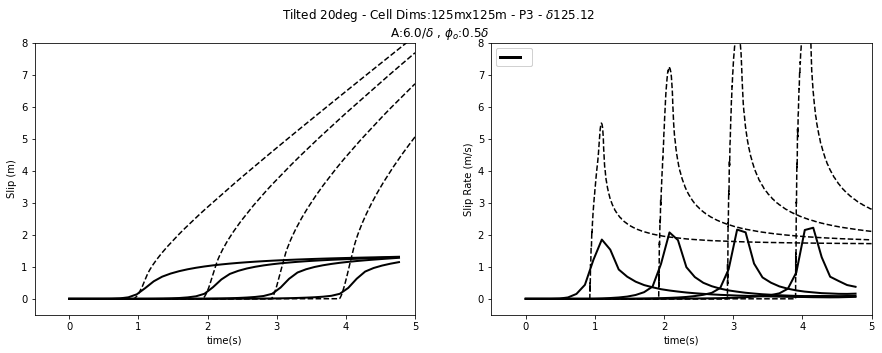

In [23]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/20210309-TIlting/"
TiltedFile = LoadPickleFile(Filename = "TPList_t1950_d125.12.pickle",FolderPath = FolderTiltedPath)


fig, axis = GenericFigAxis()


# Tilted case plotting

iidx = 0
for Test1 in TiltedFile[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

    
LabelsPerColor= [""]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Tilted 20deg - Cell Dims:125mx125m - P3 - $\delta$125.12 \nA:6.0/$\delta$ , $\phi_o$:0.5$\delta$")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

# P1 - 125m x 125m - NonBlended - Tilted 20deg - A:6/$\delta$   $\phi_o:0.5\delta$

In [25]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/20210310-Tilting/"
TiltedFile1 = LoadPickleFile(Filename = "T4-TPList_t905_d62.625.pickle",FolderPath = FolderTiltedPath)
TiltedFile2 = LoadPickleFile(Filename = "T5-TPList_t905_d93.875.pickle",FolderPath = FolderTiltedPath)
TiltedFile3 = LoadPickleFile(Filename = "T6-TPList_t905_d125.12.pickle",FolderPath = FolderTiltedPath)
TiltedFile4 = LoadPickleFile(Filename = "T7-TPList_t905_d156.38.pickle",FolderPath = FolderTiltedPath)
TiltedFile5 = LoadPickleFile(Filename = "T8-TPList_t905_d187.62.pickle",FolderPath = FolderTiltedPath)
TiltedFile6 = LoadPickleFile(Filename = "T9-TPList_t905_d218.88.pickle",FolderPath = FolderTiltedPath)
TiltedFile7 = LoadPickleFile(Filename = "T3-TPList_t905_d250.12.pickle",FolderPath = FolderTiltedPath)

In [43]:
from palettable.cartocolors.qualitative import Safe_5

cmap = ListedColormap(Safe_5.mpl_colors[:])

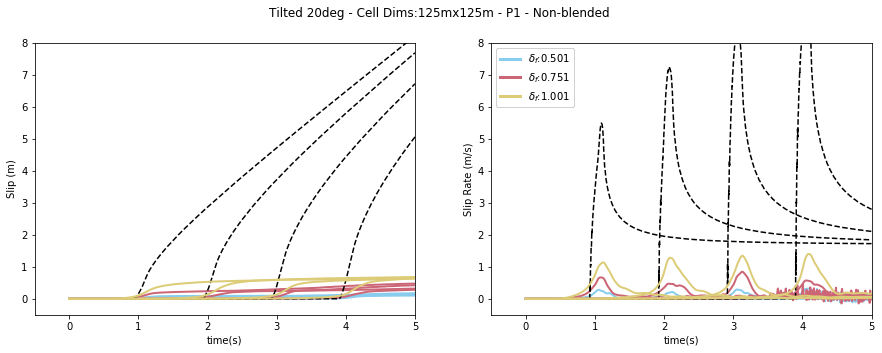

In [44]:
fig, axis = GenericFigAxis()


# Tilted case plotting

iidx = 0
for Test1 in TiltedFile1[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
iidx = 1
for Test1 in TiltedFile2[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
iidx = 2
for Test1 in TiltedFile3[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

    
LabelsPerColor= ["$\delta_f$:0.501","$\delta_f$:0.751","$\delta_f$:1.001"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Tilted 20deg - Cell Dims:125mx125m - P1 - Non-blended")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

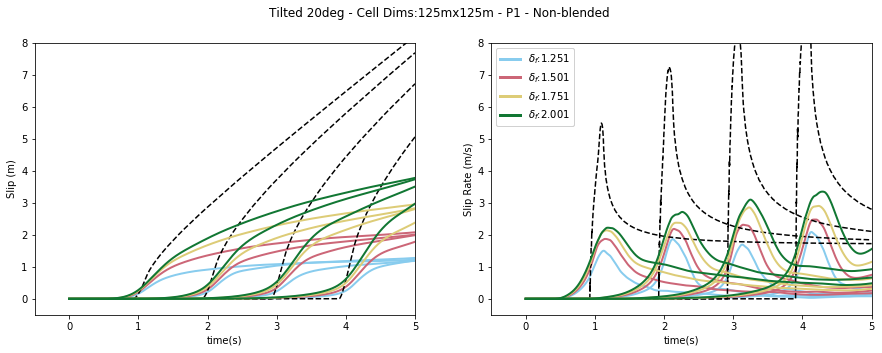

In [45]:
fig, axis = GenericFigAxis()


# Tilted case plotting

iidx = 0
for Test1 in TiltedFile4[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
iidx = 1
for Test1 in TiltedFile5[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
iidx = 2
for Test1 in TiltedFile6[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
iidx = 3
for Test1 in TiltedFile7[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

    
LabelsPerColor= ["$\delta_f$:1.251","$\delta_f$:1.501","$\delta_f$:1.751","$\delta_f$:2.001"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Tilted 20deg - Cell Dims:125mx125m - P1 - Non-blended")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

# P1 - 62.5m x 62.5m - NonBlended - Tilted 20deg$

In [46]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/20210310-Tilting/"
TiltedFile1 = LoadPickleFile(Filename = "T4-TPList_t1809_d31.3125.pickle",FolderPath = FolderTiltedPath)
TiltedFile2 = LoadPickleFile(Filename = "T5-TPList_t1809_d46.9375.pickle",FolderPath = FolderTiltedPath)
TiltedFile3 = LoadPickleFile(Filename = "T6-TPList_t1809_d62.56249999999999.pickle",FolderPath = FolderTiltedPath)
TiltedFile4 = LoadPickleFile(Filename = "T7-TPList_t1809_d78.1875.pickle",FolderPath = FolderTiltedPath)
TiltedFile5 = LoadPickleFile(Filename = "T8-TPList_t1809_d93.8125.pickle",FolderPath = FolderTiltedPath)
TiltedFile6 = LoadPickleFile(Filename = "T9-TPList_t1809_d109.4375.pickle",FolderPath = FolderTiltedPath)
TiltedFile7 = LoadPickleFile(Filename = "T4-TPList_t1809_d125.0625.pickle",FolderPath = FolderTiltedPath)

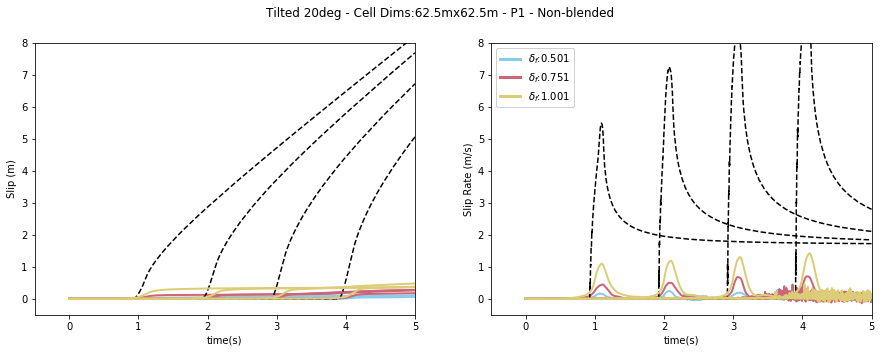

In [49]:
fig, axis = GenericFigAxis()


# Tilted case plotting

iidx = 0
for Test1 in TiltedFile1[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
iidx = 1
for Test1 in TiltedFile2[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
iidx = 2
for Test1 in TiltedFile3[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

    
LabelsPerColor= ["$\delta_f$:0.501","$\delta_f$:0.751","$\delta_f$:1.001"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Tilted 20deg - Cell Dims:62.5mx62.5m - P1 - Non-blended")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

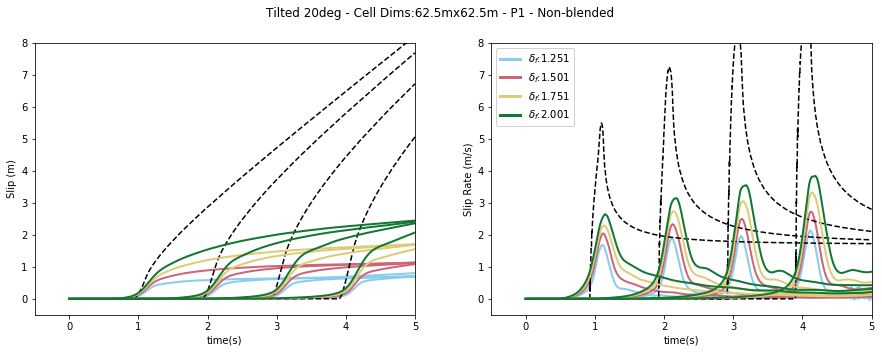

In [50]:
fig, axis = GenericFigAxis()


# Tilted case plotting

iidx = 0
for Test1 in TiltedFile4[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
iidx = 1
for Test1 in TiltedFile5[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
iidx = 2
for Test1 in TiltedFile6[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
iidx = 3
for Test1 in TiltedFile7[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

    
LabelsPerColor= ["$\delta_f$:1.251","$\delta_f$:1.501","$\delta_f$:1.751","$\delta_f$:2.001"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Tilted 20deg - Cell Dims:62.5mx62.5m - P1 - Non-blended")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

# Comparison

In [51]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/20210310-Tilting/"
TiltedFile1 = LoadPickleFile(Filename = "T3-TPList_t905_d250.12.pickle",FolderPath = FolderTiltedPath)
TiltedFile2 = LoadPickleFile(Filename = "T4-TPList_t1809_d125.0625.pickle",FolderPath = FolderTiltedPath)

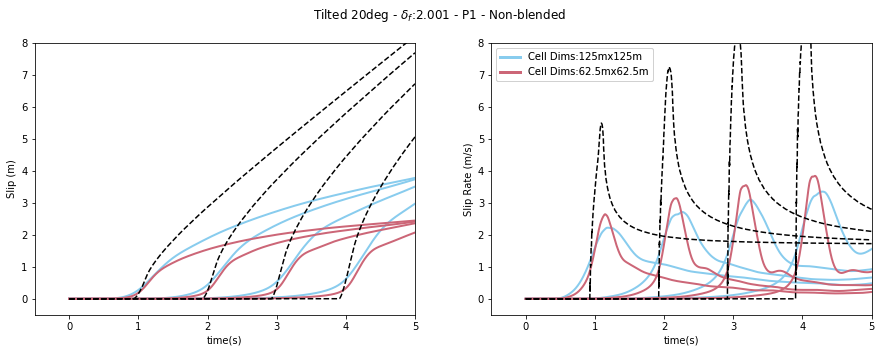

In [54]:
fig, axis = GenericFigAxis()


# Tilted case plotting

iidx = 0
for Test1 in TiltedFile1[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
iidx = 1
for Test1 in TiltedFile2[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 


    
LabelsPerColor= ["Cell Dims:125mx125m","Cell Dims:62.5mx62.5m"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Tilted 20deg - $\delta_f$:2.001 - P1 - Non-blended")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

# Comparison 2

In [63]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/20210310-Tilting/"
TiltedFile0 = LoadPickleFile(Filename = "T4-TPList_t1809_d62.56249999999999.pickle",FolderPath = FolderTiltedPath)
TiltedFile1 = LoadPickleFile(Filename = "T4-2-TPList_t1809_d125.0625.pickle",FolderPath = FolderTiltedPath)
TiltedFile2 = LoadPickleFile(Filename = "T4-TPList_t1809_d187.5625.pickle",FolderPath = FolderTiltedPath)


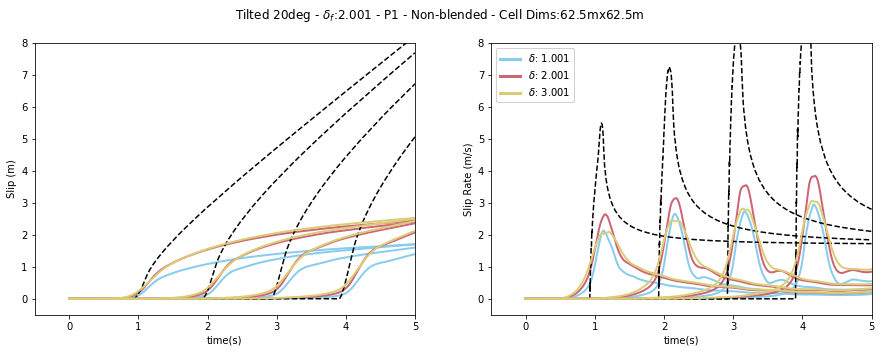

In [64]:
fig, axis = GenericFigAxis()


# Tilted case plotting
iidx = 0
for Test1 in TiltedFile0[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 


iidx = 1
for Test1 in TiltedFile1[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
iidx = 2
for Test1 in TiltedFile2[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 


    
LabelsPerColor= ["$\delta$: 1.001", "$\delta$: 2.001","$\delta$: 3.001"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Tilted 20deg - $\delta_f$:2.001 - P1 - Non-blended - Cell Dims:62.5mx62.5m")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

# Comparison 3

In [66]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/20210310-Tilting/"
TiltedFile1 = LoadPickleFile(Filename = "P2-TPList_t566_d250.12.pickle",FolderPath = FolderTiltedPath)
TiltedFile2 = LoadPickleFile(Filename = "P1-TPList_t1131_d125.06.pickle",FolderPath = FolderTiltedPath)

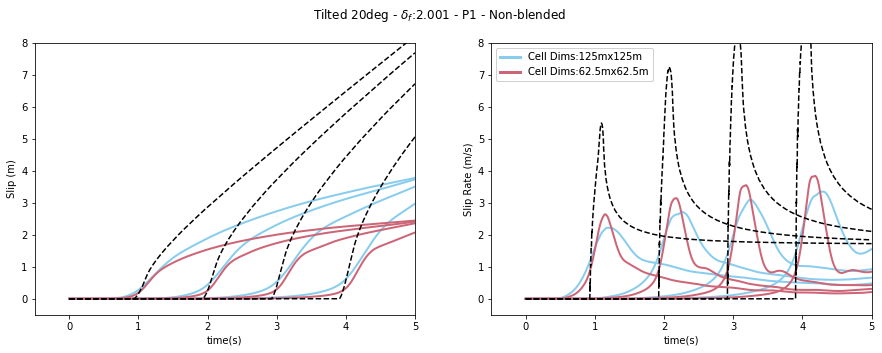

In [67]:
fig, axis = GenericFigAxis()


# Tilted case plotting

iidx = 0
for Test1 in TiltedFile1[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
iidx = 1
for Test1 in TiltedFile2[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 


    
LabelsPerColor= ["Cell Dims:125mx125m","Cell Dims:62.5mx62.5m"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Tilted 20deg - $\delta_f$:2.001 - P1 - Non-blended")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

In [70]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/20210311-Tilting/"
TiltedFile1 = LoadPickleFile(Filename = "P1-TPList_t566_d125.12499999999999.pickle",FolderPath = FolderTiltedPath)
TiltedFile2 = LoadPickleFile(Filename = "P2-TPList_t1131_d62.56249999999999.pickle",FolderPath = FolderTiltedPath)

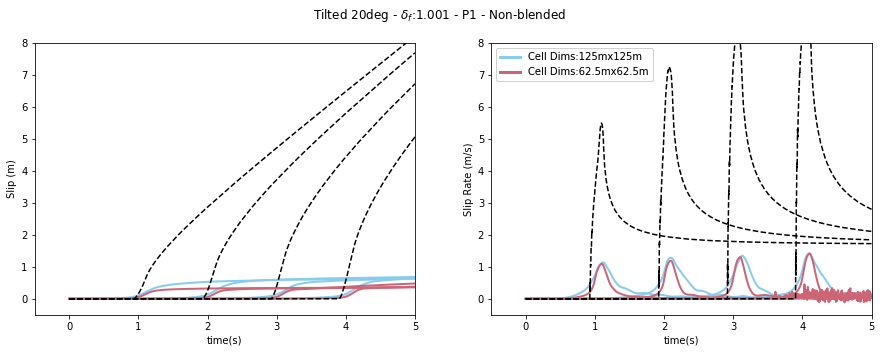

In [71]:
fig, axis = GenericFigAxis()


# Tilted case plotting

iidx = 0
for Test1 in TiltedFile1[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
iidx = 1
for Test1 in TiltedFile2[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 


    
LabelsPerColor= ["Cell Dims:125mx125m","Cell Dims:62.5mx62.5m"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Tilted 20deg - $\delta_f$:1.001 - P1 - Non-blended")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

In [86]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/20210311-Tilting/"
TiltedFile1 = LoadPickleFile(Filename = "T5-TPList_t1131_d62.56249999999999.pickle",FolderPath = FolderTiltedPath)
TiltedFile2 = LoadPickleFile(Filename = "P2-TPList_t1131_d62.56249999999999.pickle",FolderPath = FolderTiltedPath)

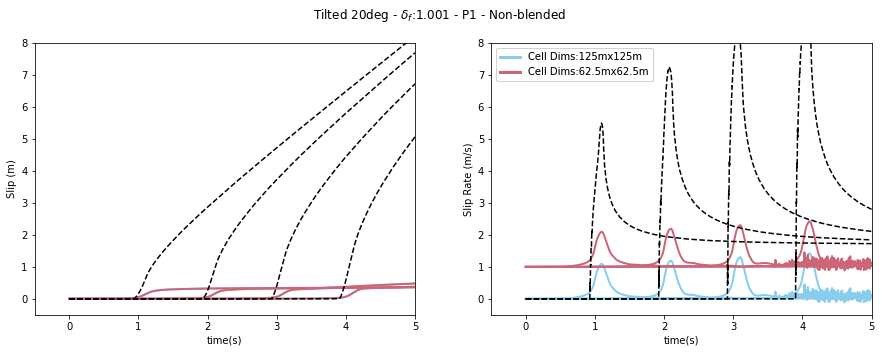

In [93]:
fig, axis = GenericFigAxis()


# Tilted case plotting

iidx = 0
for Test1 in TiltedFile1[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
iidx = 1
for Test1 in TiltedFile2[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, [i+1 for i in Test1.VelX], color= cmap.colors[iidx],linewidth=2,zorder=iidx) 


    
LabelsPerColor= ["Cell Dims:125mx125m","Cell Dims:62.5mx62.5m"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Tilted 20deg - $\delta_f$:1.001 - P1 - Non-blended")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

In [94]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/20210311-Tilting/"
TiltedFile1 = LoadPickleFile(Filename = "P1-TPList_t566_d125.12499999999999.pickle",FolderPath = FolderTiltedPath)
TiltedFile2 = LoadPickleFile(Filename = "P3-TPList_t2261_d31.281249999999996.pickle",FolderPath = FolderTiltedPath)

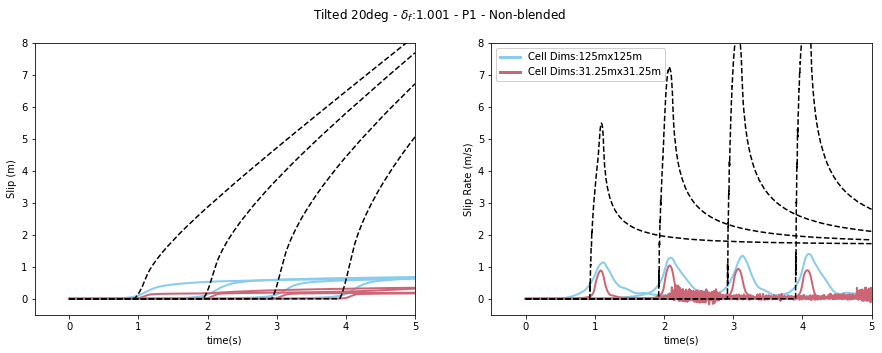

In [98]:
fig, axis = GenericFigAxis()


# Tilted case plotting

iidx = 0
for Test1 in TiltedFile1[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 
    
iidx = 1
for Test1 in TiltedFile2[:-1]:
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 


    
LabelsPerColor= ["Cell Dims:125mx125m","Cell Dims:31.25mx31.25m"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Tilted 20deg - $\delta_f$:1.001 - P1 - Non-blended")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]